In [1]:
# to check if GPU has started (GPU - for heavy tasks, training DL models)
!nvidia-smi

Sun Jul 30 11:16:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# New Section

In [3]:
# tensorflow version
print(f"tensorflow version: {tf.__version__}")
print(f"keras version: {tf.keras.__version__}")

tensorflow version: 2.12.0
keras version: 2.12.0


In [4]:
# For saving the model on colab

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# to see current working directory
!pwd

/content


In [67]:
ROOT = "/content/drive/MyDrive/FSDS2.0_Bootcamp/Classification using ANN"
os.chdir(ROOT) #changing root directory for the project

In [8]:
!pwd

/content/drive/MyDrive/FSDS2.0_Bootcamp


## GPU/CPU check

In [9]:
tf.config.list_logical_devices("GPU")

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [10]:
tf.config.list_logical_devices("CPU")

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [11]:
check_list = ['GPU','CPU']

for device in check_list:
    out=tf.config.list_logical_devices(device)
    if len(device) > 0:
        print(f"{device} is available")
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available!")

GPU is available
Details >> [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
CPU is available
Details >> [LogicalDevice(name='/device:CPU:0', device_type='CPU')]


## Load MNIST data

In [12]:
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
# these are pixels of charatcer
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
y_train_full # dependent variable

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
X_train_full.shape # height and width of image is 28, 60000 images are there

(60000, 28, 28)

In [16]:
y_train_full.shape # 60000 labels

(60000,)

In [17]:
X_train_full.dtype # 0-255 => unsigned integer means no negative value

dtype('uint8')

In [18]:
len(X_train_full[0][0]) # each image resolution 28X28

28

In [19]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
# test data shape
X_test.shape

(10000, 28, 28)

In [21]:
y_test.shape

(10000,)

<Axes: >

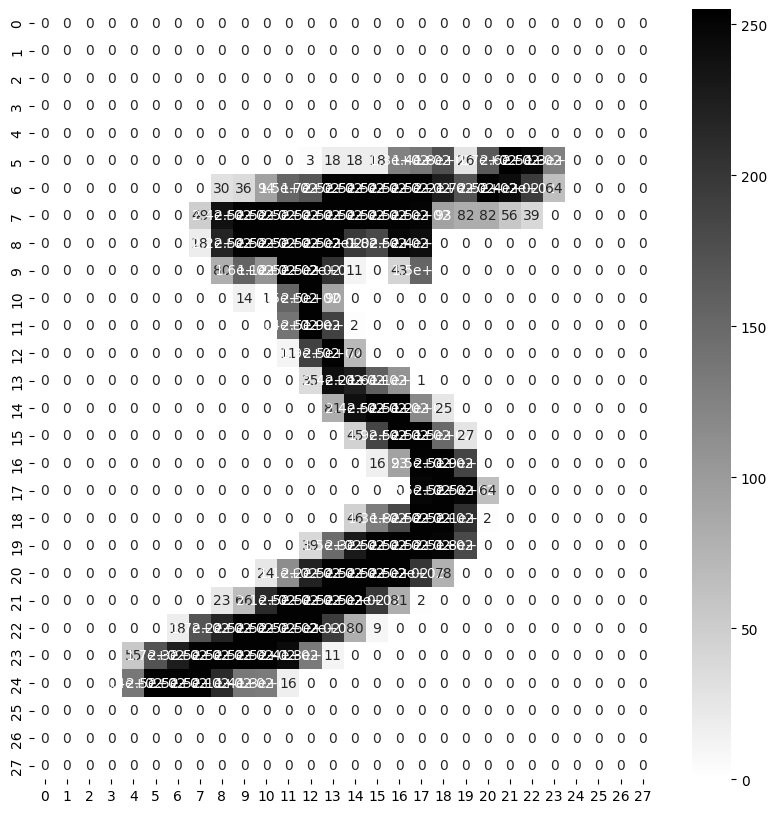

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_full[0],annot=True,cmap='binary')

In [23]:
# data is bw 0-255 so scaling is not there, scaling problem

In [24]:
# Applying Min-Max Scaling why Standard scaler is not used ?
# Because image not negative as STD Scaler is bw [-1,1]

In [25]:
X_valid, X_train = X_train_full[:5000] / 255. , X_train_full[5000:] / 255. # 0 to 5000 in validation set
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
# 255. dot is used for floating no.

# scale test data
X_test = X_test / 255.

In [26]:
# whenever we train our model we validate model after every epoch
X_train.shape

(55000, 28, 28)

In [27]:
X_valid.shape

(5000, 28, 28)

<Axes: >

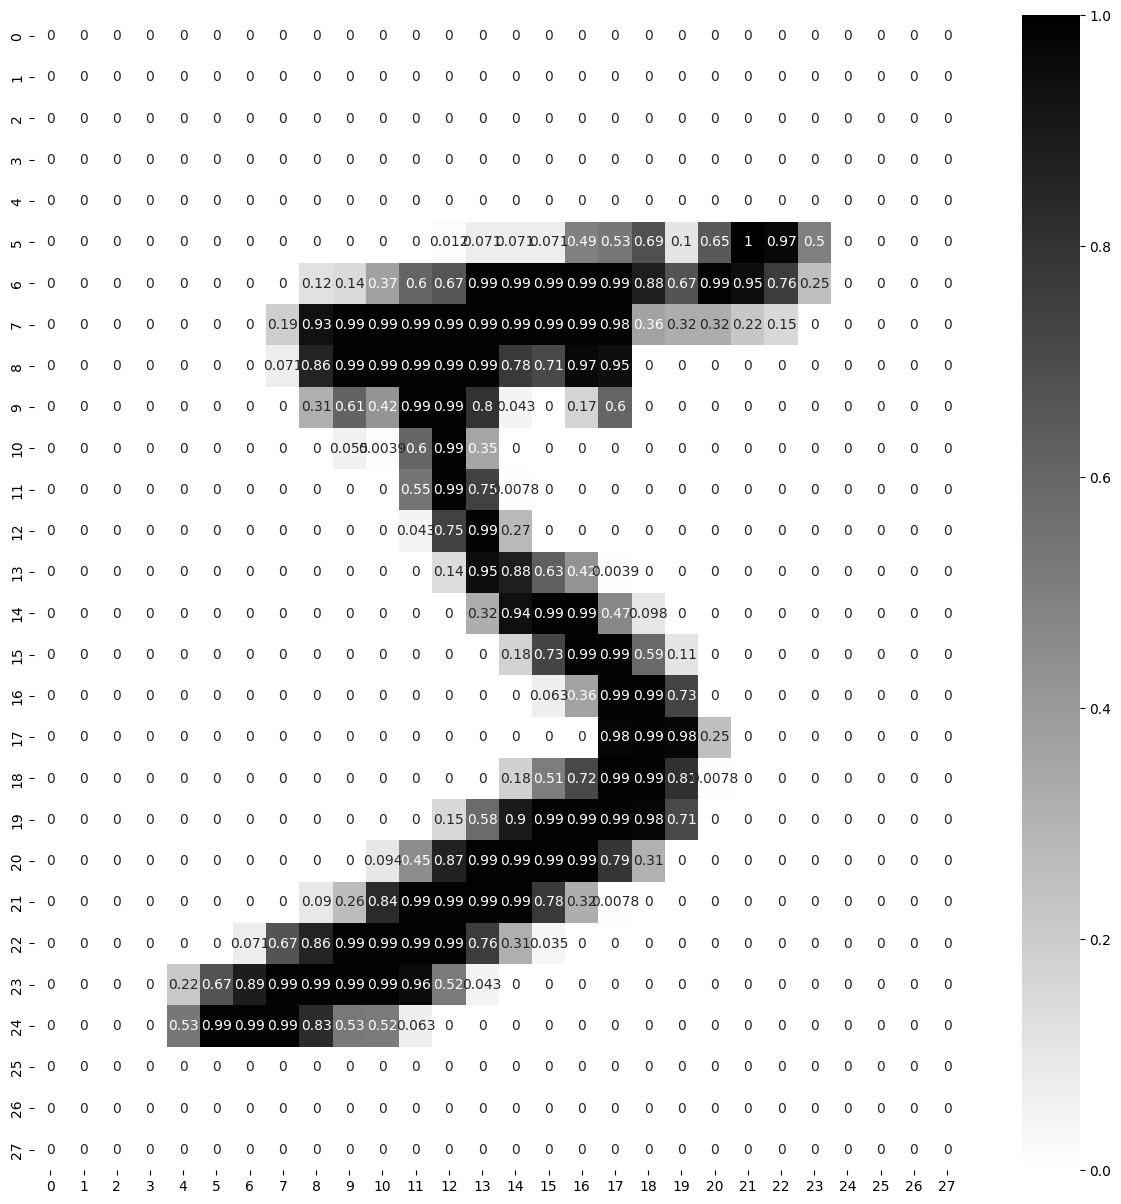

In [28]:
# scaled down the data to [0,1]
plt.figure(figsize=(15,15))
sns.heatmap(X_valid[0], annot=True, cmap="binary")

In Deep Learning always do three partition: train,test,vaidation

In [29]:
# input data shape = [28,28]
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name= "inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name= "hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name= "hiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name= "outputLayer")
]   # Multi-classification problem so use softmax activation function


model_clf = tf.keras.models.Sequential(LAYERS)

In [30]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 1st layer
784*300 + 300

235500

In [32]:
# 2nd layer
300*100 + 300

30300

In [33]:
# 3rd layer
100*10 + 10

1010

In [34]:
23550 + 30100 + 1010

54660

In [35]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [36]:
hidden1.get_weights()

[array([[ 0.04928067, -0.01745178, -0.04459926, ...,  0.06121348,
         -0.05856461, -0.02598078],
        [-0.01724064,  0.01513585, -0.00607314, ...,  0.03486345,
         -0.01308688, -0.01679542],
        [ 0.06134801,  0.05645931, -0.0421491 , ..., -0.01639547,
         -0.00219632,  0.05540878],
        ...,
        [ 0.03770704, -0.02999507, -0.00344577, ..., -0.03026521,
          0.07120749, -0.02840989],
        [-0.03756938,  0.01150816, -0.07415257, ..., -0.04943909,
          0.07040665,  0.01672263],
        [-0.0154582 , -0.0145839 ,  0.03955825, ...,  0.0476349 ,
          0.01996894, -0.00388707]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [37]:

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # Stochastic Gradient Descent # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Tensorboard callback Functions

In [38]:
# Log

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_07_30_11_17_34


## Early Stopping Callback
used for early stopping, which stops training when a monitored metric has stopped improving

In [39]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## Model Checkpoint callback
used to save the model's weights during training

In [40]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

# save best model only if incase power shutdown or system crash

In [41]:
# Original train

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                        validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb])


Epoch 1/10
1719/1719 [==============================] - 13s 4ms/step - loss: 0.6134 - accuracy: 0.8398 - val_loss: 0.3106 - val_accuracy: 0.9128
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2906 - accuracy: 0.9173 - val_loss: 0.2438 - val_accuracy: 0.9306
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2370 - accuracy: 0.9320 - val_loss: 0.2109 - val_accuracy: 0.9418
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2018 - accuracy: 0.9427 - val_loss: 0.1804 - val_accuracy: 0.9492
Epoch 5/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.1756 - accuracy: 0.9497 - val_loss: 0.1670 - val_accuracy: 0.9542
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1553 - accuracy: 0.9554 - val_loss: 0.1491 - val_accuracy: 0.9602
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1388 - accuracy: 0.9602 - val_loss: 0.1391 - val_accuracy

In [42]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0967 - accuracy: 0.9729 - val_loss: 0.1071 - val_accuracy: 0.9696
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0895 - accuracy: 0.9750 - val_loss: 0.1008 - val_accuracy: 0.9702
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0830 - accuracy: 0.9771 - val_loss: 0.0978 - val_accuracy: 0.9720
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0769 - accuracy: 0.9787 - val_loss: 0.0935 - val_accuracy: 0.9732
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0719 - accuracy: 0.9801 - val_loss: 0.0902 - val_accuracy: 0.9736
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0669 - accuracy: 0.9816 - val_loss: 0.0890 - val_accuracy: 0.9748
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0626 - accuracy: 0.9830 - val_loss: 0.0873 - val_accuracy:

In [43]:
# Orginal train

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                        validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0968 - accuracy: 0.9726 - val_loss: 0.1079 - val_accuracy: 0.9700
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0892 - accuracy: 0.9752 - val_loss: 0.1039 - val_accuracy: 0.9704
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0830 - accuracy: 0.9771 - val_loss: 0.0991 - val_accuracy: 0.9722
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0766 - accuracy: 0.9789 - val_loss: 0.0964 - val_accuracy: 0.9728
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0718 - accuracy: 0.9804 - val_loss: 0.0937 - val_accuracy: 0.9738
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0668 - accuracy: 0.9819 - val_loss: 0.0925 - val_accuracy: 0.9738
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0628 - accuracy: 0.9829 - val_loss: 0.0875 - val_accuracy:

## Saving the Model

In [44]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [45]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2023_07_30_11_21_29_.h5 will be saved at TRAINED_MODEL/Model_2023_07_30_11_21_29_.h5


'TRAINED_MODEL/Model_2023_07_30_11_21_29_.h5'

In [46]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [47]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.096849,0.972582,0.107881,0.9700
1,0.089231,0.975236,0.103851,0.9704
2,0.082996,0.977091,0.099127,0.9722
3,0.076601,0.978891,0.096449,0.9728
4,0.071773,0.980382,0.093704,0.9738
5,0.066814,0.981855,0.092522,0.9738
6,0.062837,0.982855,0.087535,0.9766
7,0.058844,0.984327,0.084175,0.9750
8,0.055536,0.985200,0.081078,0.9768
9,0.051908,0.986218,0.079921,0.9778


<Axes: >

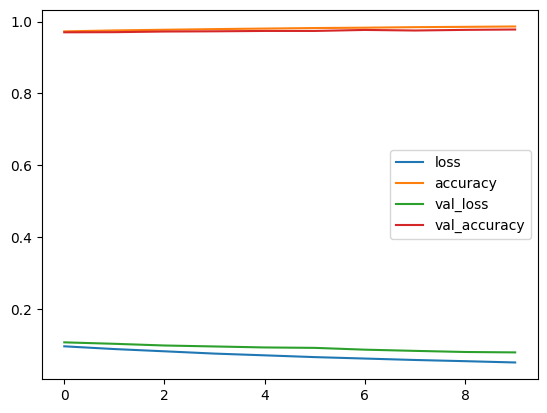

In [48]:
pd.DataFrame(history.history).plot()

In [49]:
%load_ext tensorboard

In [50]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [51]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0789 - accuracy: 0.9755


[0.0789012610912323, 0.9754999876022339]

In [52]:
x_new = X_test[:3]
# x_new

In [53]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [54]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 86ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [55]:
y_pred = np.argmax(y_prob, axis = -1)
y_pred

array([7, 2, 1])

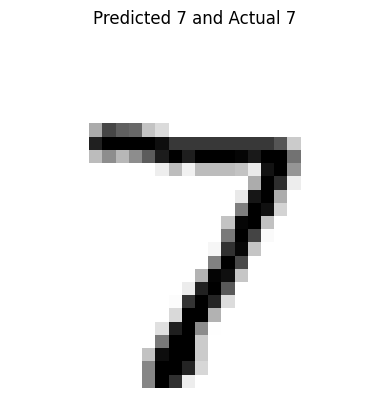

#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#


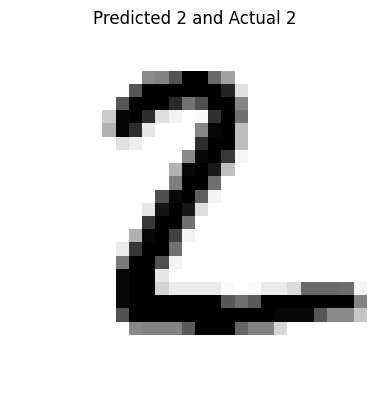

#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#


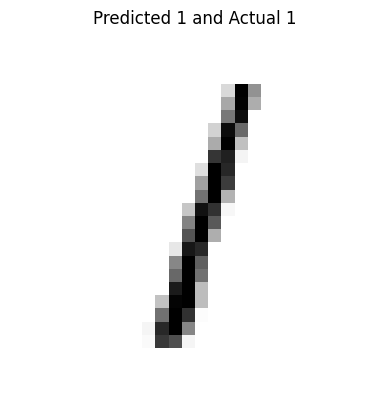

#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#


In [59]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#_#")

In [60]:
os.listdir("TRAINED_MODEL")

['Model_2023_07_29_11_52_52_.h5',
 'Model_2023_07_29_13_06_27_.h5',
 'Model_2023_07_30_11_21_29_.h5']

In [64]:
path_name_model = "TRAINED_MODEL/Model_2023_07_30_11_21_29_.h5"
loaded_model = tf.keras.models.load_model(path_name_model)
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0789 - accuracy: 0.9755


[0.0789012610912323, 0.9754999876022339]

In [65]:
predict= loaded_model.predict(x_new)
classes=np.argmax(predict,axis=1)

1/1 [==============================] - 0s 87ms/step


In [66]:
classes

array([7, 2, 1])